# PRCP-1025-FlightPricePrediction

### Problem statement : 

With the help of dataset having prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities, our aim is implement ML model which will perform below prediction: 

- estimates Flight Prices to help users look for best prices when booking flight tickets.
- Optimized multiple Regression models using GridsearchCV to reach the best model.

Size of training set: 10683 records , 11 features

### Dataset Features:

Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: Departure time is when a plane leaves the gate.

Arrival_Time: Arrival time is when the plane pulls up to the gate.

Duration: Time taken by plane to reach destination is called Duration. It is the differnce betwwen Departure Time and Arrival time.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket


### Identify the independent and dependent variable : 
- Target variable : Price
- Predictor variable : All

### Type of problem : 
Regression



# 1. IMPORT packages, libraries

In [1]:
# for loading data
import pandas as pd
import numpy as np

# for data processing/splitting
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler,MinMaxScaler
from collections import Counter
from scipy import stats
import scipy as sp

# for defining model
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from xgboost import XGBRegressor

# Hyper parameter tuning
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import KFold, cross_val_score

# for evaluating algorithm performance
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

# For visualization
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sb

import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('always')

Matplotlib is building the font cache; this may take a moment.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\l

# 2. Load Data : 

In [2]:
data = pd.read_excel('C:\\Users\\Nikita\\010521_My DS Projects\\Dataset\\flight-fare\\Flight_Fare.xlsx',engine="openpyxl")
print(data.shape)
data.head()

C:\ProgramData\Anaconda3\lib\site-packages\openpyxl\xml\functions.py:31: DeprecationWarning: defusedxml.lxml is no longer supported and will be removed in a future release.
  from defusedxml.lxml import fromstring as _fromstring, tostring


(10683, 11)


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


# 3. EDA : Feature Engineering

### [A] Feature Imputation : NaN values checkpoint 

In [3]:
print(data.isnull().sum(),'\n\nData shape : ',data.shape)

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64 

Data shape :  (10683, 11)


In [4]:
# filter out null records
data[data['Route'].isnull() | data['Total_Stops'].isnull()].style.highlight_null(null_color='red')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,nan,09:45,09:25 07 May,23h 40m,nan,No info,7480


Instead of dropping NaN value record, We have replaced it with equivalent record, so as to preserve data size.

In [5]:
# find equivalent record value
filtered = data[(data.Source=='Delhi') & (data.Destination=='Cochin') & (data.Airline=='Air India') & 
     (data.Duration.str.startswith('23h 40m')) & (data.Arrival_Time.str.endswith('May')) & (data.Price==7480)]

# lets replace NaN value with equivalent value
data.fillna(value={'Route': 'DEL → MAA → COK', 'Total_Stops': '1 stop'},inplace=True)

# print equivalents records values to replace
print('\nequivalent record for missing value is :')
filtered


equivalent record for missing value is :


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
1616,Air India,24/05/2019,Delhi,Cochin,DEL → MAA → COK,09:45,09:25 25 May,23h 40m,1 stop,No info,7480
2554,Air India,15/05/2019,Delhi,Cochin,DEL → MAA → COK,09:45,09:25 16 May,23h 40m,1 stop,No info,7480
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10683 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10683 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
data.describe(include='all')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
count,10683,10683,10683,10683,10683,10683,10683,10683,10683,10683,10683.000000
unique,12,44,5,6,128,222,1343,368,5,10,NaN
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info,NaN
freq,3849,504,4537,4537,2376,233,423,550,5626,8345,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9087.064121
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4611.359167
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1759.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5277.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8372.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12373.000000


# Duplicates records checkpoint :

In [8]:
# check duplicate record
data.duplicated(subset = None).sum()
data[data.duplicated()].sort_values(by=['Airline','Source','Destination','Route','Duration','Price'])

# drop duplicate record
data.drop_duplicates(keep='first',inplace= True)
print(data.shape)

(10463, 11)


### Unwanted column checkpoint : column with more than 70% missing value

In [9]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [10]:
#value count for additional info
data["Additional_Info"].value_counts()

No info                         8183
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
Red-eye flight                     1
1 Short layover                    1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [11]:
#Replace No Info with No info
data["Additional_Info"] = data["Additional_Info"].replace({'No Info': 'No info'})

In [12]:
# 'Additional_Info' mostly has 'No info', so we can drop it.
#Dropping columns having more than 70% missing value.

col_percent = ((data.Additional_Info == 'No Info')|(data.Additional_Info == 'No info')).mean()
print('% of missing info in column: ',col_percent,'\n And our threshold is 0.8, so we are not droping column')
# data.drop(['Additional_Info'],inplace= True,axis=1)
# data.reset_index(drop=True)  # reset index after dropping rows/column
# print(data.shape)

% of missing info in column:  0.7823759915894103 
 And our threshold is 0.8, so we are not droping column


#### We are not dropping this feature as R2 score is reduced after dropping

### [B] Feature Splitting & Feature extracting Datetime : 

From description we can see that Date_of_Journey is a object data type,\ Therefore, we have to convert this datatype into timestamp so as to use this column properly for prediction

In [13]:
# Arrival_Time
print('\n*** Arrival_Time format : \n',data.Arrival_Time.head(1))
data["Arrival_hour"] = pd.to_datetime(data.Arrival_Time).dt.hour.astype(int)
data["Arrival_min"] = pd.to_datetime(data.Arrival_Time).dt.minute.astype(int)
data.drop(["Arrival_Time"], axis = 1, inplace = True)
print('\nDatatype after conversion : ',data['Arrival_hour'].dtypes,data['Arrival_min'].dtypes)
data.head(3)

# Dep_Time
print('*** Dep_Time format : \n',data.Dep_Time.head(1))
data["Dep_hour"] = pd.to_datetime(data["Dep_Time"]).dt.hour.astype(int)
data["Dep_min"] = pd.to_datetime(data["Dep_Time"]).dt.minute.astype(int)
data.drop(["Dep_Time"], axis = 1, inplace = True)
print('\nDatatype after conversion : ',data['Dep_hour'].dtypes,data['Dep_min'].dtypes)

# Duration column convert into minutes
print('\n*** Column Duration conversion >> \n','Datatype Before conversion : ',data['Duration'].dtypes)
data['Duration']=  data['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval).astype(int)
print('Datatype After conversion : ',data['Duration'].dtypes)

# Total_Stops column
print('\n*** Column Total_Stops before conversion Having Datatype : ',data['Total_Stops'].dtypes)
data['Total_Stops'].replace(['1 stop', 'non-stop', '2 stops', '3 stops', '4 stops'], [1, 0, 2, 3, 4], inplace=True)
data['Total_Stops']=data['Total_Stops'].astype(int)
print('After conversion column values Having Datatype : ',data['Total_Stops'].dtypes)

# Date_of_Journey
print('\n*** Date_of_Journey format : ',data.Date_of_Journey.head(1))
data["Journey_day"] = pd.to_datetime(data.Date_of_Journey, format="%d/%m/%Y").dt.day.astype(int)
data["Journey_month"] = pd.to_datetime(data.Date_of_Journey, format = "%d/%m/%Y").dt.month.astype(int)
data.drop(["Date_of_Journey"], axis = 1, inplace = True)
print('\nDatatype after conversion : ',data['Journey_day'].dtypes,data['Journey_month'].dtypes)
data.head(3)


*** Arrival_Time format : 
 0    01:10 22 Mar
Name: Arrival_Time, dtype: object

Datatype after conversion :  int32 int32
*** Dep_Time format : 
 0    22:20
Name: Dep_Time, dtype: object

Datatype after conversion :  int32 int32

*** Column Duration conversion >> 
 Datatype Before conversion :  object
Datatype After conversion :  int32

*** Column Total_Stops before conversion Having Datatype :  object
After conversion column values Having Datatype :  int32

*** Date_of_Journey format :  0    24/03/2019
Name: Date_of_Journey, dtype: object

Datatype after conversion :  int32 int32


,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,0,No info,3897,1,10,22,20,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2,No info,7662,13,15,5,50,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2,No info,13882,4,25,9,25,9,6


In [14]:
# Reindex column position in dataset
data=data.reindex(columns=['Airline','Source','Destination','Route','Journey_day','Journey_month','Duration','Total_Stops',
                           'Arrival_hour','Arrival_min', 'Dep_hour', 'Dep_min','Additional_Info','Price'])
print(data.shape)
data.head(3)

(10463, 14)


,Airline,Source,Destination,Route,Journey_day,Journey_month,Duration,Total_Stops,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Additional_Info,Price
0,IndiGo,Banglore,New Delhi,BLR → DEL,24,3,170,0,1,10,22,20,No info,3897
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,1,5,445,2,13,15,5,50,No info,7662
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,9,6,1140,2,4,25,9,25,No info,13882


In [15]:
# confirm column datatypes.
data.dtypes.unique()

array([dtype('O'), dtype('int32'), dtype('int64')], dtype=object)

### [B] Data Insights

#### Feature relationship visualization :
###### count of flights wrt other features visualization

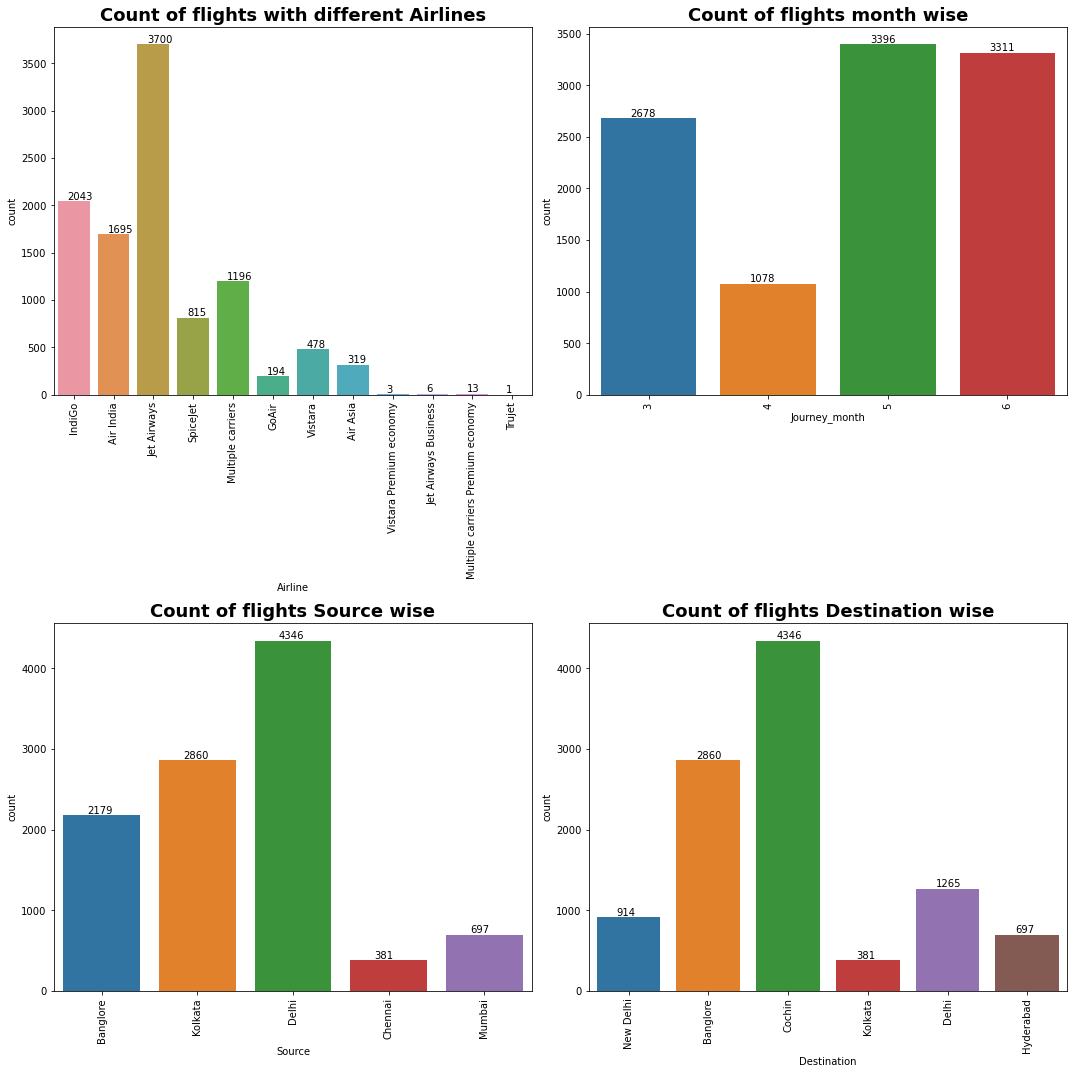

In [16]:
rcParams['figure.figsize']=15,15

plt.subplot(2,2,1)
plt.title('Count of flights with different Airlines',fontsize=18,fontweight='bold')
ax=sb.countplot(x = 'Airline', data =data)
plt.xticks(rotation = 90)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')
    
plt.subplot(2,2,2)
plt.title('Count of flights month wise',fontsize=18,fontweight='bold')
ax=sb.countplot(x = 'Journey_month', data =data)
plt.xticks(rotation = 90)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')

plt.subplot(2,2,3)
plt.title('Count of flights Source wise',fontsize=18,fontweight='bold')
ax=sb.countplot(x = 'Source', data =data)
plt.xticks(rotation = 90)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')

plt.subplot(2,2,4)
plt.title('Count of flights Destination wise',fontsize=18,fontweight='bold')
ax=sb.countplot(x = 'Destination', data =data)
plt.xticks(rotation = 90)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')
    
plt.tight_layout(pad=1)
plt.show()

#### Relationship between features wrt to target variable "Price"

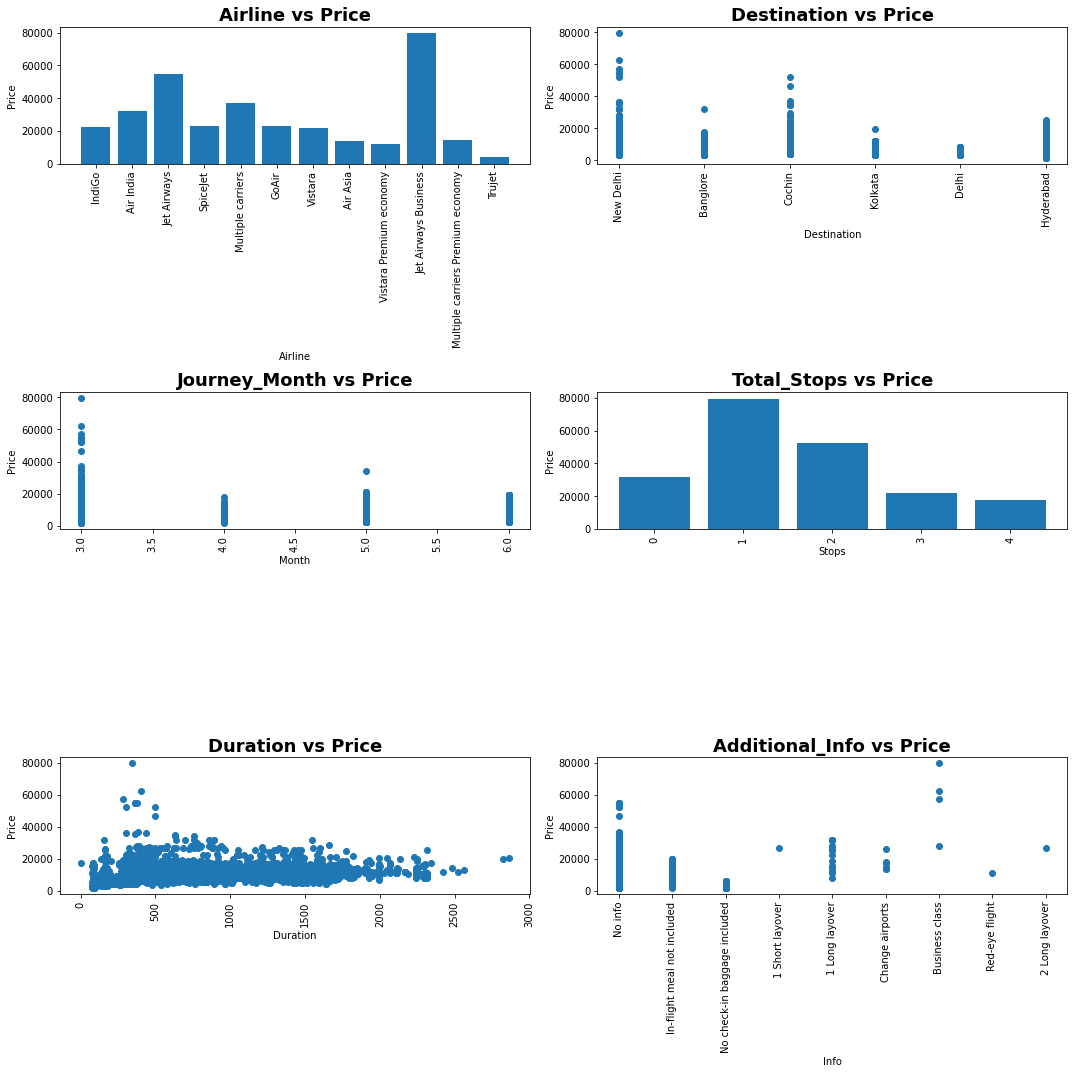

In [17]:
rcParams['figure.figsize']=15,15

plt.subplot(3,2,1)
plt.title('Airline vs Price',fontsize=18,fontweight='bold')
plt.bar(data['Airline'], data['Price'])
plt.xticks(rotation = 90)
plt.xlabel('Airline')
plt.ylabel('Price')

plt.subplot(3,2,2)
plt.title('Destination vs Price',fontsize=18,fontweight='bold')
plt.scatter(data['Destination'], data['Price'])
plt.xticks(rotation = 90)
plt.xlabel('Destination')
plt.ylabel('Price')

plt.subplot(3,2,3)
plt.title('Journey_Month vs Price',fontsize=18,fontweight='bold')
plt.scatter(data['Journey_month'], data['Price'])
plt.xticks(rotation = 90)
plt.xlabel('Month')
plt.ylabel('Price')

plt.subplot(3,2,4)
plt.title('Total_Stops vs Price',fontsize=18,fontweight='bold')
plt.bar(data['Total_Stops'], data['Price'])
plt.xticks(rotation = 90)
plt.xlabel('Stops')
plt.ylabel('Price')

plt.subplot(3,2,5)
plt.title('Duration vs Price',fontsize=18,fontweight='bold')
plt.scatter(data['Duration'], data['Price'])
plt.xticks(rotation = 90)
plt.xlabel('Duration')
plt.ylabel('Price')

plt.subplot(3,2,6)
plt.title('Additional_Info vs Price',fontsize=18,fontweight='bold')
plt.scatter(data['Additional_Info'], data['Price'])
plt.xticks(rotation = 90)
plt.xlabel('Info')
plt.ylabel('Price')
plt.xticks(rotation = 90)

plt.tight_layout(pad=1)
plt.show()

### Checking feature datatype

In [18]:
# Numerical Features
Numeric_data = data._get_numeric_data()
Numeric_data.drop('Price',inplace=True,axis=1)
print('Numeric_columns :',Numeric_data.columns)

# Categorical Features
obj_data = data.select_dtypes(include=["object"])
print('\nCategorical_columns :',obj_data.columns)

Numeric_columns : Index(['Journey_day', 'Journey_month', 'Duration', 'Total_Stops',
       'Arrival_hour', 'Arrival_min', 'Dep_hour', 'Dep_min'],
      dtype='object')

Categorical_columns : Index(['Airline', 'Source', 'Destination', 'Route', 'Additional_Info'], dtype='object')


In [19]:
Numeric_data.head(2)

,Journey_day,Journey_month,Duration,Total_Stops,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,24,3,170,0,1,10,22,20
1,1,5,445,2,13,15,5,50


### [D] Feature encoding :   

### LabelEncoder() 

In [20]:
# label encoding
enc= LabelEncoder()
obj_data=obj_data.apply(enc.fit_transform)
obj_data.head()

,Airline,Source,Destination,Route,Additional_Info
0,3,0,5,18,7
1,1,3,0,84,7
2,4,2,1,118,7
3,3,3,0,91,7
4,3,0,5,29,7


### [E]. Normality Testing for numeric features:  Normal distribution, (Skewness & Kurtosis) , Outliers checkpoint 
- use log,squareroot and box cox transformation to remove the effect of skewness if present.
- Here we do not have continuous numerical data hence normality testing is not required.
But we have mentioned the visualization technique.

In [21]:
Numeric_data.head(3)

,Journey_day,Journey_month,Duration,Total_Stops,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,24,3,170,0,1,10,22,20
1,1,5,445,2,13,15,5,50
2,9,6,1140,2,4,25,9,25


In [22]:
# Instead of plotting normal distribution and checking statistical parameter of each feature, 
# this report will fetch everythig related to EDA.
# Pandas profiling provides analysis like type, unique values, missing values, quantile statistics, mean, mode, median, 
# standard deviation, sum, skewness, frequent values, histograms, correlation between variables, count, heatmap visualization,
# (check datatype of features and crosscheck whether skewness checkpoint required(only continuous numerical feature not for categorical/ordinal)?
# check distribution of feature)

# from pandas_profiling import ProfileReport as pp
import pandas_profiling as pp

profile = pp.ProfileReport(data)
profile.to_file("EDA_Exploration.html")

Summarize dataset:   0%|          | 0/29 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

#### Check for normal distribution of numeric features

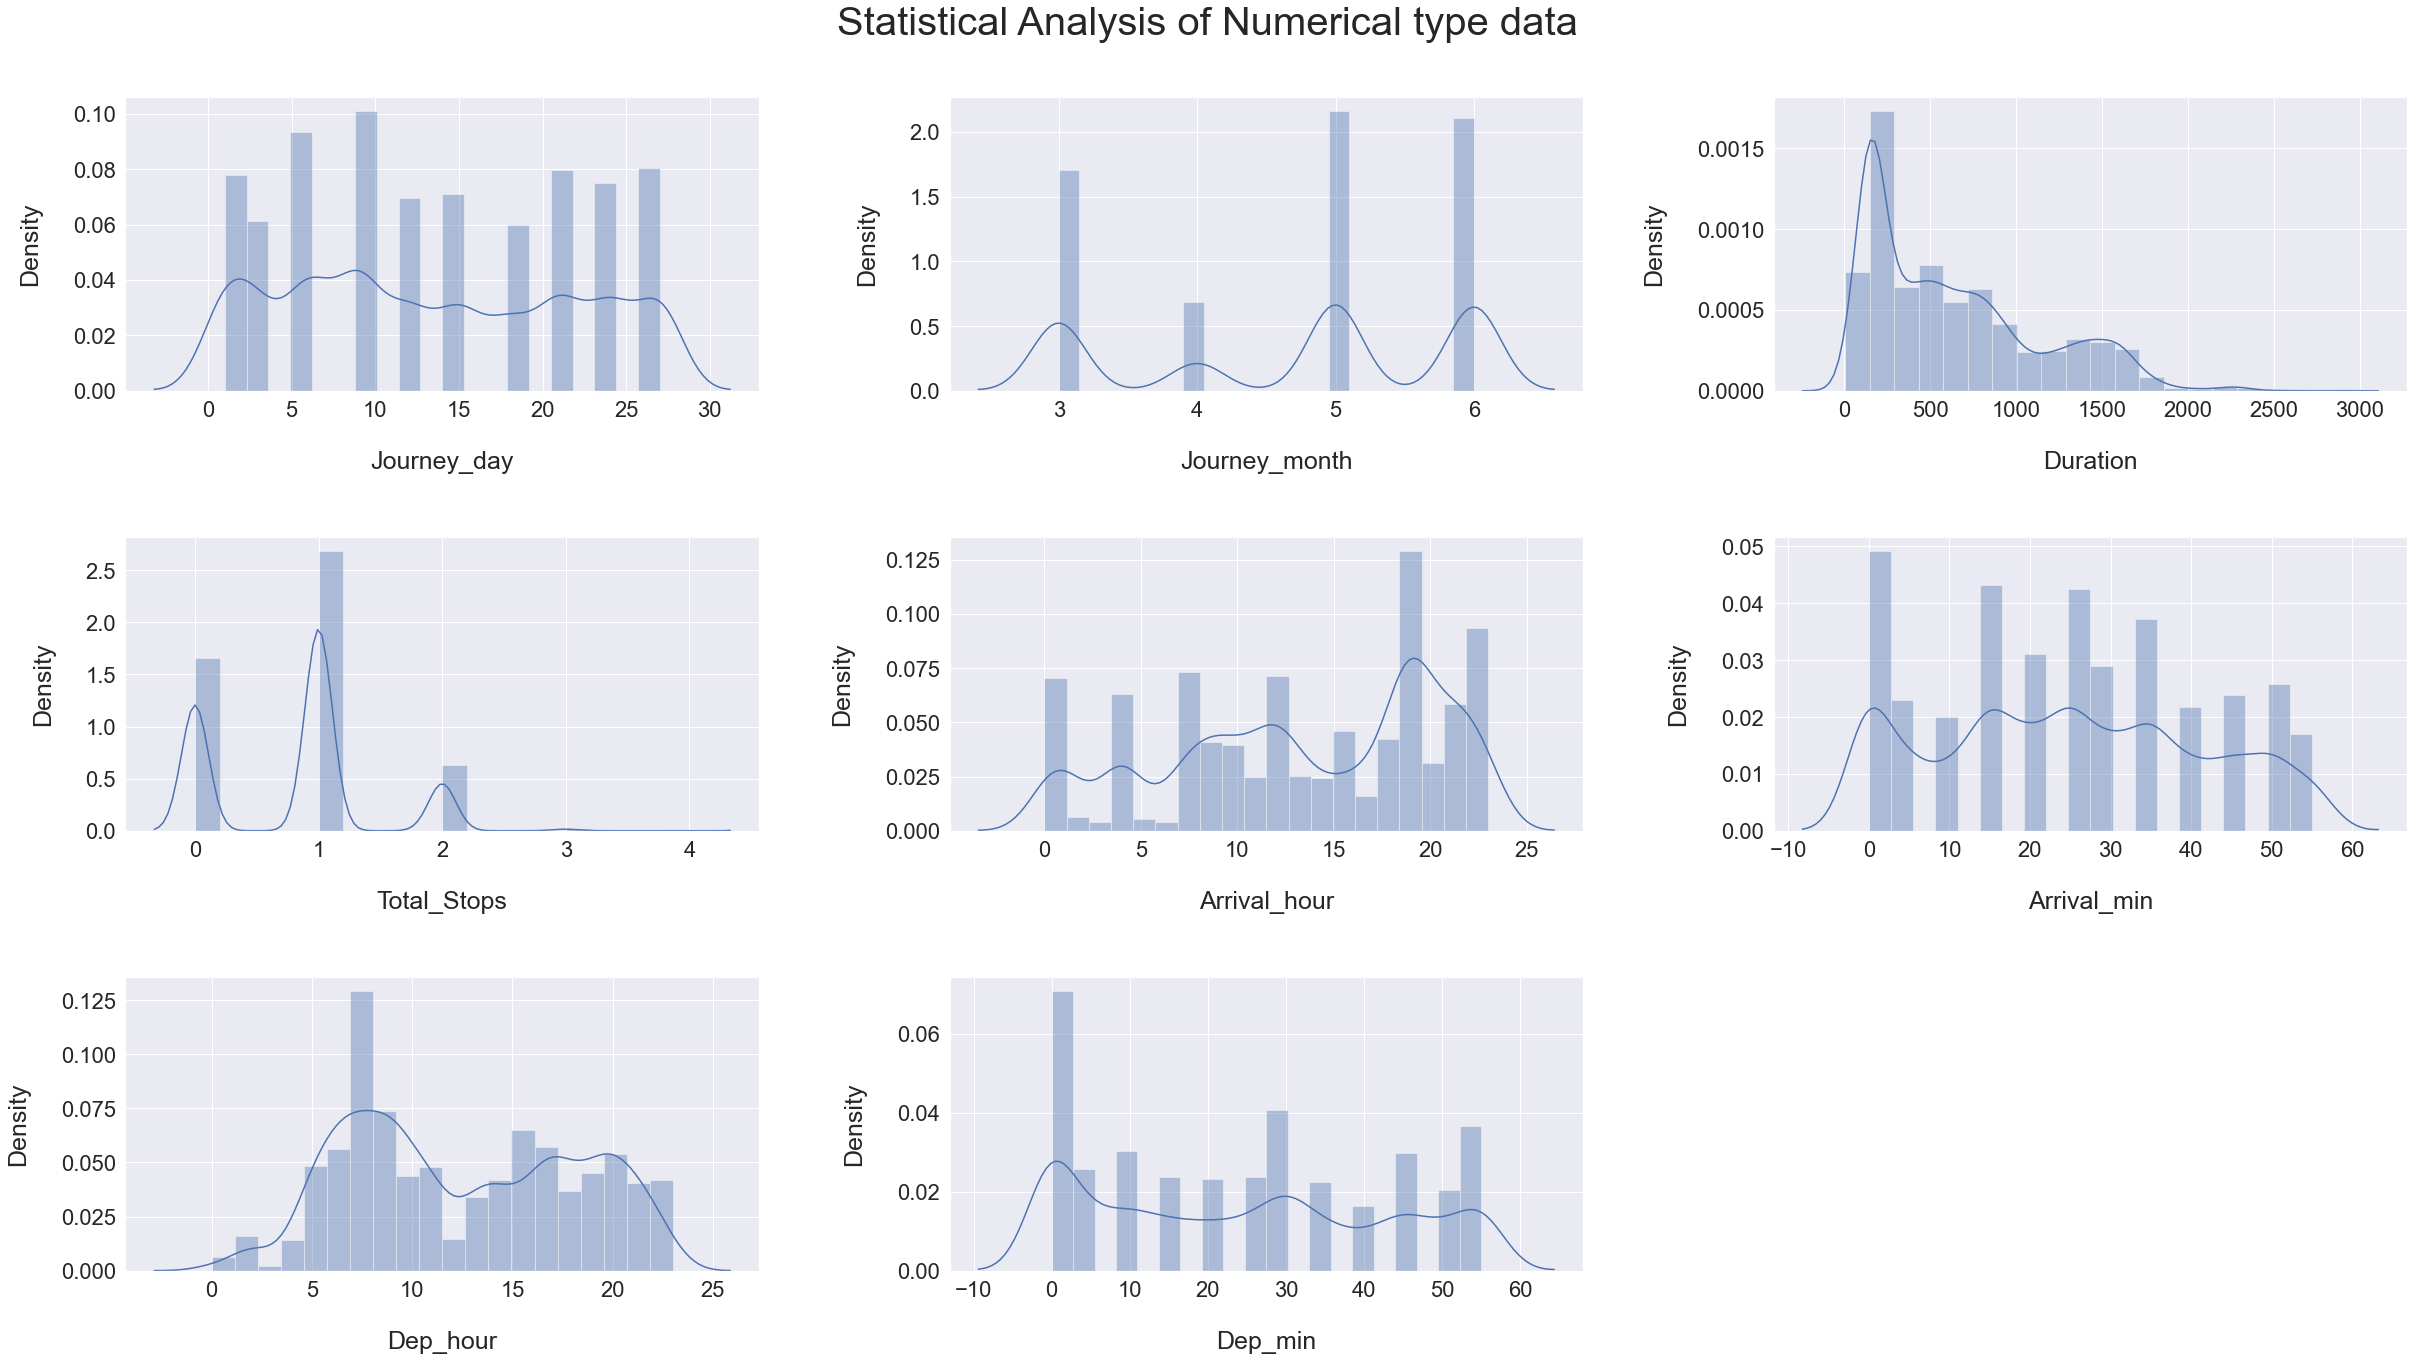

In [23]:
sb.set(rc={"font.size":15,"axes.titlesize":15,"axes.labelsize":22,"xtick.labelsize":22,"ytick.labelsize":22,
            "legend.fontsize":12})

fig = plt.figure(figsize=(35,25))
fig.suptitle("Statistical Analysis of Numerical type data", fontsize=40)
for index,col in enumerate(Numeric_data):
    plt.subplot(4,3,index+1)
    sb.distplot(Numeric_data.loc[:,col],kde=True,bins=20)
    plt.xlabel(f"\n{col}",fontsize=25)
    plt.ylabel("Density\n",fontsize=25)
fig.tight_layout(pad=4.0)
fig.subplots_adjust(top=0.93)

#### Define Function to generate normality testing statistical parameter of each feature

In [24]:
def normality (df):
    """Returns column statistics value to check normality testing.
    Args:
        df (DataFrame): dataframe having tabular data
    Returns:
        df (DataFrame): dataframe having column wise normality statistics
    """
    print('Acceptable Range of Skewness to pass normality testing, S < |1.96|','Acceptable Range of Kurtosis to pass normality testing, K < |3|',sep='\n')
    skewed=[]
    for col in df:
        sk=df[col].skew()
        kr=df[col].kurtosis()
        if((sk>= abs(1.96))|(kr>= abs(3.0))):
            skewed.append(col)
    print('Skewed features :',skewed)
    
    final=pd.DataFrame()
    for i in range (len(df.columns)) :
        mean = df[df.columns[i]].mean()
        median = df[df.columns[i]].median()
        mode = df[df.columns[i]].mode()
        mx_mn_range = max(df[df.columns[i]])-min(df[df.columns[i]])
        std = np.std(df[df.columns[i]])
        var = np.var(df[df.columns[i]])
        skew = stats.skew(df[df.columns[i]])
        kurt = stats.kurtosis(df[df.columns[i]])
        new=pd.Series([df.columns[i],mean,median,mode,mx_mn_range,std,var,skew,kurt],index=['Feature','Mean','Median','Mode','Range','Standard_deviation','Varience','Skewness','Kurtosis'])
        new= pd.DataFrame(new).transpose()
        final=pd.concat([final,new],ignore_index=True)
        final.iloc[:,1:] = final.iloc[:,1:].astype(float)
    return final

In [25]:
df_normality = normality(Numeric_data)
df_normality

Acceptable Range of Skewness to pass normality testing, S < |1.96|
Acceptable Range of Kurtosis to pass normality testing, K < |3|
Skewed features : []


,Feature,Mean,Median,Mode,Range,Standard_deviation,Varience,Skewness,Kurtosis
0,Journey_day,13.4625,12,9,26,8.467,71.6901,0.124789,-1.26792
1,Journey_month,4.70152,5,5,3,1.16369,1.35419,-0.377567,-1.32454
2,Duration,629.857,505,170,2855,500.711,250711,0.903487,-0.0540231
3,Total_Stops,0.802351,1,1,4,0.660549,0.436324,0.332189,-0.35536
4,Arrival_hour,13.3873,14,19,23,6.85503,46.9914,-0.378761,-1.05803
5,Arrival_min,24.72,25,0,55,16.5689,274.527,0.110787,-1.04206
6,Dep_hour,12.4782,11,9,23,5.72678,32.796,0.108442,-1.19113
7,Dep_min,24.407,25,0,55,18.815,354.004,0.171067,-1.29465


Here, all features pass normality testing condition.

## Outlier Analysis
Outlier : In statistics, an outlier is an observation point that is distant from other observations.

#### Define function that will plot Multi-feature Boxplot and univariate boxplot of features passed in function argument

In [26]:
def boxplot_visual(df,column_names,plt_n,plt_m):
    """This functions plots boxplot of features
    Args:
        df (DataFrame): dataframe having tabular data
        column_names: list of column names ['a','b','c']
        plt_n:subplot total number of rows
        plt_m:subplot total number of columns
    Returns:
        boxplot visualization in subplots.  
    """
    rcParams['figure.figsize']= 20,5
    df.plot(kind='box')   # to plot multiple feature in single plot
    plt.title('Multi-feature Plot to detect outliers',fontsize=20)
    plt.show()
    
    fig,axes = plt.subplots(plt_n,plt_m,figsize=(15,5))
#     fig,axes = plt.subplots(plt_n,plt_m,figsize=(20,30))  # uncomment when to plot all feature subplot
    fig.suptitle('univariate outlier analysis using boxplot',fontsize=20)
    total_plots = plt_n*plt_m   # total no of plots >= no of features passed in argument.
    for i in range (min(total_plots,len(column_names))) :
        plt.subplot(plt_n,plt_m,(i+1))
        sb.boxplot(df[column_names[i]])
    fig.tight_layout(pad=2.0)
    plt.show()

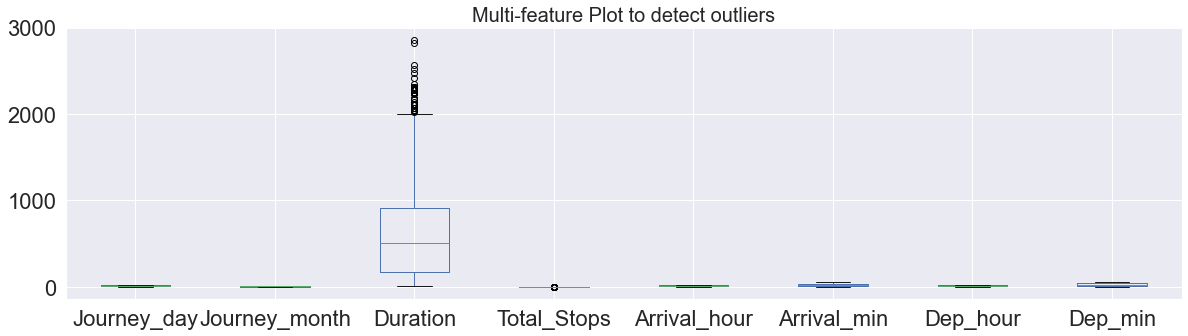

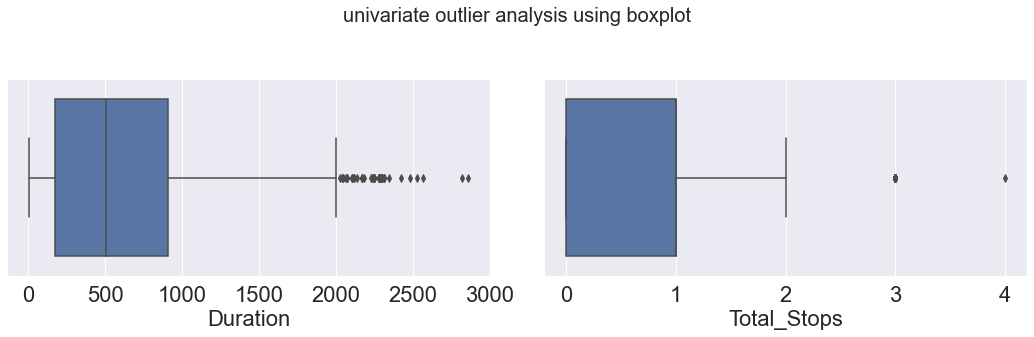

In [27]:
# boxplot_visual(Numeric_data,Numeric_data.columns,2,4)      
boxplot_visual(Numeric_data,['Duration','Total_Stops'],1,2)  

#### Define function that will generate five number summary and outlier percentage of each features in dataset.

In [28]:
def five_number_summary(df,column_names):
    """ This function will print five number summary statistics for outlier analysis.
    Args:
        df (DataFrame): dataframe having tabular data
        column_names: list of column names ['a','b','c']
    Returns:
        df (DataFrame): dataframe having five number summary statistics of each feature
    """
    table=pd.DataFrame()
    for i in range (len(column_names)) :
        Q1 = df[column_names[i]].quantile(0.25)
        Q3 = df[column_names[i]].quantile(0.75)
#         IQR = Q3 - Q1
        IQR = stats.iqr(df[column_names[i]],interpolation='midpoint')
        feature_median = np.median(df[column_names[i]])
        min_whisker = (Q1-1.5*IQR)
        max_whisker = (Q3+1.5*IQR)
        max_percent = len(df[df[column_names[i]]>max_whisker])/ len(df[column_names[i]])*100
        min_percent = len(df[df[column_names[i]]<min_whisker])/ len(df[column_names[i]])*100
        outlier_percent = (max_percent+min_percent)
        if outlier_percent == 0.0 :
            Remark = 'No Outliers present.'
        elif outlier_percent >= 5.0 :
            Remark ='As outlier percentage > 5%, there is no point to call them outlier and outlier handling treatment is not required. Instead impute them with mean or median value if required.'           
        else :
            Remark ='As outlier percentage < 5%, need to handle outliers.If normally distributed, use mean to do imputation.\nIf skewness is present then use median for imputation. If overall data size is large then you can drop the outliers as last option.'
        new=pd.Series([column_names[i],Q1,Q3,IQR,feature_median,min_whisker,max_whisker,outlier_percent,Remark],index=['Feature','Q1','Q3','IQR','Median','min_whisker','max_whisker','outlier_percent','Remark'])
        new= pd.DataFrame(new).transpose()
        table=pd.concat([table,new],ignore_index=True)
    return table

In [29]:
df_outlier = five_number_summary (Numeric_data,Numeric_data.columns)
# print(df_outlier.Remark.unique())
df_outlier

,Feature,Q1,Q3,IQR,Median,min_whisker,max_whisker,outlier_percent,Remark
0,Journey_day,6,21,15,12,-16.5,43.5,0,No Outliers present.
1,Journey_month,3,6,3,5,-1.5,10.5,0,No Outliers present.
2,Duration,170,910,740,505,-940,2020,0.716812,"As outlier percentage < 5%, need to handle out..."
3,Total_Stops,0,1,1,1,-1.5,2.5,0.420529,"As outlier percentage < 5%, need to handle out..."
4,Arrival_hour,8,19,11,14,-8.5,35.5,0,No Outliers present.
5,Arrival_min,10,35,25,25,-27.5,72.5,0,No Outliers present.
6,Dep_hour,8,18,10,11,-7,33,0,No Outliers present.
7,Dep_min,5,40,35,25,-47.5,92.5,0,No Outliers present.


##### handle outliers by imputing them with median

In [30]:
# df_outlier[(df_outlier['outlier_percent'] <= 5.0) & (df_outlier['outlier_percent'] != 0.0)]
df_outlier[df_outlier['outlier_percent'] != 0.0]

,Feature,Q1,Q3,IQR,Median,min_whisker,max_whisker,outlier_percent,Remark
2,Duration,170,910,740,505,-940,2020,0.716812,"As outlier percentage < 5%, need to handle out..."
3,Total_Stops,0,1,1,1,-1.5,2.5,0.420529,"As outlier percentage < 5%, need to handle out..."


In [31]:
Numeric_non_outlier = Numeric_data.copy()
Numeric_non_outlier['Duration'].where(Numeric_non_outlier['Duration'] < 2020, other=505,inplace=True)
Numeric_non_outlier['Total_Stops'].where(Numeric_non_outlier['Total_Stops'] < 2.5, other=1,inplace=True)

# Recheck presence of outliers
five_number_summary (Numeric_non_outlier,['Duration','Total_Stops'])

,Feature,Q1,Q3,IQR,Median,min_whisker,max_whisker,outlier_percent,Remark
0,Duration,170,897.5,727.5,505,-921.25,1988.75,0.0860174,"As outlier percentage < 5%, need to handle out..."
1,Total_Stops,0,1,1,1,-1.5,2.5,0,No Outliers present.


In [32]:
Numeric_non_outlier['Duration'].where(Numeric_non_outlier['Duration'] < 1988, other=505,inplace=True)
# Recheck presence of outliers
five_number_summary (Numeric_non_outlier,['Duration','Total_Stops'])
# Numeric_non_outlier.head()

,Feature,Q1,Q3,IQR,Median,min_whisker,max_whisker,outlier_percent,Remark
0,Duration,170,895,725,505,-917.5,1982.5,0,No Outliers present.
1,Total_Stops,0,1,1,1,-1.5,2.5,0,No Outliers present.


In [33]:
# After handling outlier,check distribution again
normality(Numeric_non_outlier)

Acceptable Range of Skewness to pass normality testing, S < |1.96|
Acceptable Range of Kurtosis to pass normality testing, K < |3|
Skewed features : []


,Feature,Mean,Median,Mode,Range,Standard_deviation,Varience,Skewness,Kurtosis
0,Journey_day,13.4625,12,9,26,8.467,71.6901,0.124789,-1.26792
1,Journey_month,4.70152,5,5,3,1.16369,1.35419,-0.377567,-1.32454
2,Duration,616.015,505,170,1970,479.493,229913,0.808537,-0.464048
3,Total_Stops,0.793845,1,1,2,0.644663,0.415591,0.222588,-0.687035
4,Arrival_hour,13.3873,14,19,23,6.85503,46.9914,-0.378761,-1.05803
5,Arrival_min,24.72,25,0,55,16.5689,274.527,0.110787,-1.04206
6,Dep_hour,12.4782,11,9,23,5.72678,32.796,0.108442,-1.19113
7,Dep_min,24.407,25,0,55,18.815,354.004,0.171067,-1.29465


### Creating final dataframe

In [34]:
# combining numerical, ordinal & categorial features
# final_df = pd.concat([Numeric_data,obj_data,data.Price], axis=1)
final_df = pd.concat([Numeric_non_outlier,obj_data,data.Price], axis=1)
final_df.head()

,Journey_day,Journey_month,Duration,Total_Stops,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Airline,Source,Destination,Route,Additional_Info,Price
0,24,3,170,0,1,10,22,20,3,0,5,18,7,3897
1,1,5,445,2,13,15,5,50,1,3,0,84,7,7662
2,9,6,1140,2,4,25,9,25,4,2,1,118,7,13882
3,12,5,325,1,23,30,18,5,3,3,0,91,7,6218
4,1,3,285,1,21,35,16,50,3,0,5,29,7,13302


#### Our dataset is READY now!

#### Defining dependent and independent variables

In [35]:
X = final_df.iloc[:,:-1]
# X = final_df.loc[:,['Duration','Total_Stops','Airline','Route','Journey_day','Journey_month']]   # feature_importance by ExtraTreesRegressor
y = final_df.Price
print(X.shape,y.shape)

(10463, 13) (10463,)


### [F ] Feature selection :

Finding out the best feature which will contribute and have good relation with target variable. Following are some of the feature selection methods,

1.heatmap

2.featureimportance

3.SelectKBest

check multicollinearity : between features then you can drop features ad keep 1(Route and Total_Stops are related to each other)

#### Correlation Matrix and Heatmap

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\matrix.py:268: PendingDeprecationWarning: 
The label function will be deprecated in a future version. Use Tick.label1 instead.
  fontsize = tick.label.get_size()
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\matrix.py:268: PendingDeprecationWarning: 
The label function will be deprecated in a future version. Use Tick.label1 instead.
  fontsize = tick.label.get_size()


<AxesSubplot:>

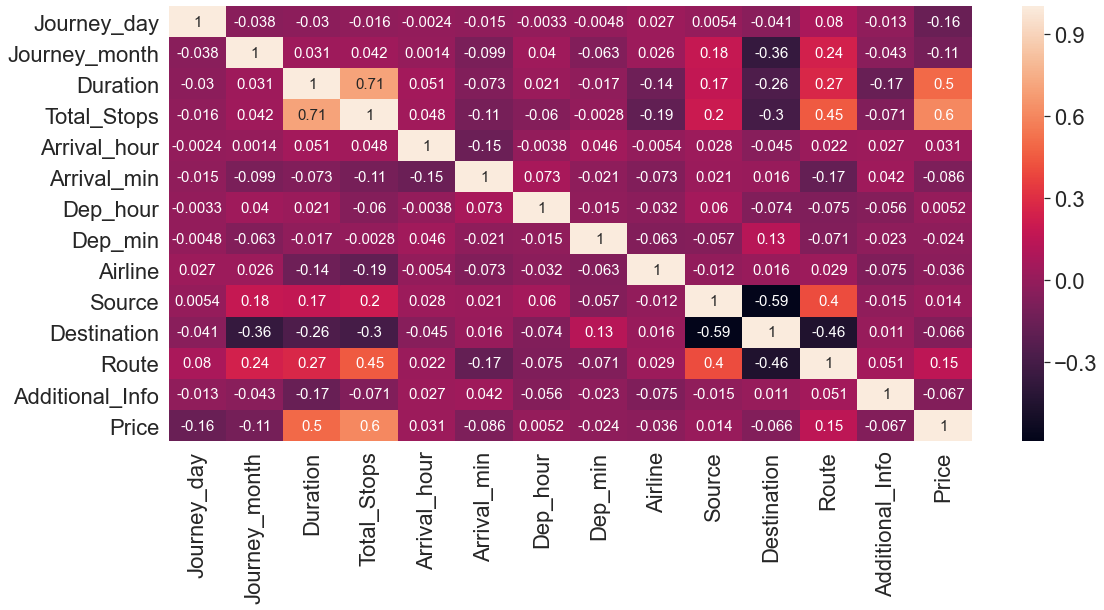

In [36]:
# Correlation matrix summarizes the strength & direction of the linear association between two quantitative variables 
# and having values between -1 and +1.

corrMatrix = final_df.corr()
rcParams['figure.figsize']=18,8   # set figure size
sb.heatmap(corrMatrix, annot=True)

#### Feature_importances_ by ExtraTreesRegressor :

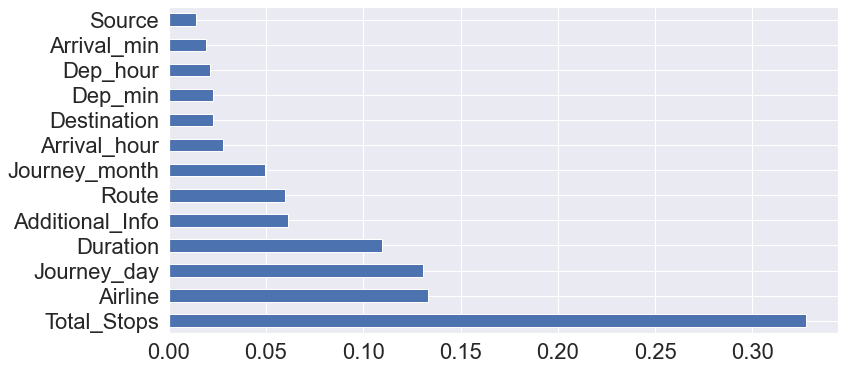

The coefficient of determination  of the prediction is 0.995110513919149


In [37]:
# from sklearn.ensemble import ExtraTreesRegressor

selection = ExtraTreesRegressor()
selection.fit(X, y)                     # Build a forest of trees from the training set (X, y).
# print(selection.feature_importances_)   #The values of this array sum to 1

#plot graph of feature importances for better visualization
plt.figure(figsize = (12,6))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
# print(feat_importances) 
feat_importances.nlargest(13).plot(kind='barh')
plt.show()
print('The coefficient of determination  of the prediction is',selection.score(X,y) )

In [38]:
selection.get_params(deep=True)

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

## 4. Train-Testing data split

In [39]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.25,random_state=10) 
print('input size',data.shape,'\ntraining size',X_train.shape,y_train.shape,'\ntesting size',X_test.shape,y_test.shape)

input size (10463, 14) 
training size (7847, 13) (7847,) 
testing size (2616, 13) (2616,)


## 5. Model Selection and Building. Evaluating model performance

**The Regression models selected:**

- Linear regression
- Ridge Linear regression
- Lasso Linear regression
- KNN regressor
- RandomForestRegressor
- DecisionTreeRegressor
- Extra Trees Regressor
- XGBRegressor

**Model Evaluation metrics used:**

- R2 score 
- Adjusted R2 score
- MSE
- RMSE
- MAE
- mean absolute percentage error (MAPE)

In [40]:
# MAPE model evaluation parameter
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# function to print model performance parameter for single model
def Regression_model (model,X_train=X_train,y_train=y_train,X_test=X_test,y_test=y_test) :
    model = model
    model.fit(X_train,y_train)
    y_predict = model.predict(X_test)
    MSE = mean_squared_error(y_test,y_predict)
    MAE = mean_absolute_error(y_test,y_predict)
    RMSE = np.sqrt(mean_squared_error(y_test,y_predict))
    R2score = r2_score(y_test,y_predict)
    Train_R2score = model.score(X_train,y_train)
    Test_R2score = model.score(X_test,y_test)
    Adjusted_R2score = (1-(1-r2_score(y_test,y_predict))*((len(X_test)-1)/(len(X_test)-len(X_test.iloc[0])-1)))
    MAPE = mean_absolute_percentage_error (y_test,y_predict)
    print('***',model,'***')
    print('MSE:',MSE,'\t\tMAE:',MAE,'\t\tRMSE:',RMSE,'\nTraining R2 score:',Train_R2score,'\nTesting R2 score:',Test_R2score,'\n\nR2 score:',R2score,'\nAdjusted R2 score:',Adjusted_R2score,'\n(mean_absolute_percentage_error)MAPE:',MAPE,'\n','-------'*5)
    return y_predict

# function to print model performance parameters for multiple models in table format
def Regression_models_evaluation (models,X_train=X_train,y_train=y_train,X_test=X_test,y_test=y_test) :
    before = pd.DataFrame(columns=['Model Name','MSE','MAE','RMSE','Train_R2score','Test_R2score','R2score','Adjusted_R2score','MAPE'])
    for i in range (len(models)):
        name = models[i]
        model = models[i]
        model.fit(X_train,y_train)
        y_predict = model.predict(X_test)
        MSE = mean_squared_error(y_test,y_predict)
        MAE = mean_absolute_error(y_test,y_predict)
        RMSE = np.sqrt(mean_squared_error(y_test,y_predict))
        R2score = r2_score(y_test,y_predict)
        Train_R2score = model.score(X_train,y_train)
        Test_R2score = model.score(X_test,y_test)
        Adjusted_R2score = (1-(1-r2_score(y_test,y_predict))*((len(X_test)-1)/(len(X_test)-len(X_test.iloc[0])-1)))
        MAPE = mean_absolute_percentage_error (y_test,y_predict)
        new=pd.Series([name,MSE,MAE,RMSE,Train_R2score,Test_R2score,R2score,Adjusted_R2score,MAPE],index=['Model Name','MSE','MAE','RMSE','Train_R2score','Test_R2score','R2score','Adjusted_R2score','MAPE'])
        new= pd.DataFrame(new).transpose()
        before=pd.concat([before,new],ignore_index=True)
    return before

#### Check Basic Model performance (model before hyper-parameter tuning)

In [41]:
# define models in list.
basic_models_list = [LinearRegression(),Ridge(),Lasso(),KNeighborsRegressor(),RandomForestRegressor(),DecisionTreeRegressor(),ExtraTreesRegressor(),XGBRegressor()]

# prepare tabular model comparison dataframe
basic_models = Regression_models_evaluation(basic_models_list)
# print(before.head(2))
# convert dataframe "model name" into string and then split string to retrive model name only.
basic_models['Model Name'] = [str(i) for i in basic_models['Model Name']]
basic_models['Model Name']=basic_models['Model Name'].str.split('(').str[0]
basic_models

,Model Name,MSE,MAE,RMSE,Train_R2score,Test_R2score,R2score,Adjusted_R2score,MAPE
0,LinearRegression,1.07451e+07,2407.67,3277.97,0.435774,0.463549,0.463549,0.460869,31.9944
1,Ridge,1.0745e+07,2407.65,3277.95,0.435774,0.463554,0.463554,0.460873,31.995
2,Lasso,1.07446e+07,2407.51,3277.89,0.435774,0.463574,0.463574,0.460894,31.9934
3,KNeighborsRegressor,7.52349e+06,1660.24,2742.9,0.707093,0.624387,0.624387,0.62251,18.2694
4,RandomForestRegressor,1.83013e+06,629.085,1352.82,0.978628,0.90863,0.90863,0.908174,7.56416
5,DecisionTreeRegressor,3.82174e+06,733.373,1954.93,0.996591,0.809198,0.809198,0.808245,8.4491
6,ExtraTreesRegressor,2.00248e+06,592.697,1415.09,0.996591,0.900025,0.900025,0.899526,7.16651
7,XGBRegressor,1.48887e+06,713.726,1220.19,0.976237,0.925668,0.925668,0.925296,8.54705


We will consider R2 score as evaluation parameter for comparing model performances.

From above performance set, good performaing models are RandomForestRegressor,XGBRegressor,ExtraTreesRegressor.

We will perform hyperparameter tuning technique on these models to improve there performance more.

# 6.Hyperparameter tuning 

Hyperparameter : In machine learning, a hyperparameter is a parameter whose value is used to control the learning process.

Hyperparameter optimization :
Is the process of finding the right combination of hyperparameter values to achieve maximum performance on the data in a reasonable amount of time.
 

Choose following method for hyperparameter tuning
- GridSearchCV()
- RandomizedSearchCV()  --> Fast

Steps :
- Assign hyperparameters in form of dictionery
- Fit the model
- Check best paramters and best score

Here, best_score after using GridSearchCV is constant but with RandomizedSearchCV it keep on changing evrytime we run the code ??

In [42]:
Hypertuned_models = pd.DataFrame(columns=['Model Name','MSE','MAE','RMSE','Train_R2score','Test_R2score','R2score','Adjusted_R2score','MAPE'])
Hypertuned_models

,Model Name,MSE,MAE,RMSE,Train_R2score,Test_R2score,R2score,Adjusted_R2score,MAPE


##### ****** Hyper parameter tuning for ET regression model ****** 

In [43]:
model = ExtraTreesRegressor()

#  Check the list of available parameters with to pass as parameterGrid
# print('list of available parameters to pass as parameterGrid for Extra Tree regressor\n',ExtraTreesRegressor().get_params().keys())

# Define parameterGrid : Dictionary with parameters names (`str`) as keys and lists of parameter values to try in model.
max_depth = list(range(10,15))
# random_state = list(range(15,20)) 
ET_params = {'max_depth':max_depth,
             'n_estimators': [100, 200, 300, 400, 500],
#              'min_samples_split': [2, 5],
#              'min_samples_leaf': [1, 2],
              'random_state': [42]} # dictionary of parameters. 5x10xcv = 50 fits.

# model performance using GridSearchCV
# model_ET_GridCV = GridSearchCV(model,ET_params,cv=5,verbose=1,scoring='r2',n_jobs =-1)
# model_ET_GridCV.fit(X_train,y_train)
# print('\nmodel performance using GridSearchCV :',"Tuned Extra Tree Parameters: {}".format(model_ET_GridCV.best_params_),"Best score is {}".format(model_ET_GridCV.best_score_),sep='\n')

# model performance using RandomizedSearchCV
model_ET_RandomizedCV = RandomizedSearchCV(model,ET_params,cv=5,verbose=1,scoring='r2',n_jobs =-1)
model_ET_RandomizedCV.fit(X_train,y_train)
print('\nmodel performance using RandomizedSearchCV :',"Tuned Extra Tree Parameters: {}".format(model_ET_RandomizedCV.best_params_),"Best score is {}".format(model_ET_RandomizedCV.best_score_),sep='\n')

Fitting 5 folds for each of 10 candidates, totalling 50 fits

model performance using RandomizedSearchCV :
Tuned Extra Tree Parameters: {'random_state': 42, 'n_estimators': 200, 'max_depth': 14}
Best score is 0.8792167044680497


In [44]:
model_ET_hyper = ExtraTreesRegressor(max_depth=14,n_estimators=200,random_state=42)
model_ET_hyper.fit(X_train,y_train)
y_predict = model_ET_hyper.predict(X_test)
MSE = mean_squared_error(y_test,y_predict)
MAE = mean_absolute_error(y_test,y_predict)
RMSE = np.sqrt(mean_squared_error(y_test,y_predict))
R2score = r2_score(y_test,y_predict)
Train_R2score = model_ET_hyper.score(X_train,y_train)
Test_R2score = model_ET_hyper.score(X_test,y_test)
Adjusted_R2score = (1-(1-r2_score(y_test,y_predict))*((len(X_test)-1)/(len(X_test)-len(X_test.iloc[0])-1)))
MAPE = mean_absolute_percentage_error (y_test,y_predict)
# print('***',model_ET_hyper,'***')
# print('MSE:',MSE,'\t\tMAE:',MAE,'\t\tRMSE:',RMSE,'\nTraining R2 score:',Train_R2score,'\nTesting R2 score:',Test_R2score,'\n\nR2 score:',R2score,'\nAdjusted R2 score:',Adjusted_R2score,'\n(mean_absolute_percentage_error)MAPE:',MAPE,'\n','-------'*5)

new=pd.Series([model_ET_hyper,MSE,MAE,RMSE,Train_R2score,Test_R2score,R2score,Adjusted_R2score,MAPE],index=['Model Name','MSE','MAE','RMSE','Train_R2score','Test_R2score','R2score','Adjusted_R2score','MAPE'])
new= pd.DataFrame(new).transpose()
Hypertuned_models=pd.concat([Hypertuned_models,new],ignore_index=True)
Hypertuned_models

,Model Name,MSE,MAE,RMSE,Train_R2score,Test_R2score,R2score,Adjusted_R2score,MAPE
0,"(ExtraTreeRegressor(max_depth=14, random_state...",1.9703e+06,692.585,1403.67,0.972988,0.901632,0.901632,0.90114,8.18118


##### ****** Hyper parameter tuning for RF regression model ****** 

In [45]:
model = RandomForestRegressor()

#  Check the list of available parameters with to pass as parameterGrid
# print('list of available parameters to pass as parameterGrid for Decision Tree regressor\n',RandomForestRegressor().get_params().keys())

# Define parameterGrid : Dictionary with parameters names (`str`) as keys and lists of parameter values to try in model.
max_depth = list(range(5,20))
RF_params = {'max_depth':max_depth,
             'n_estimators': [100, 200, 300, 400, 500],
             'min_samples_split': [2, 5],
             'min_samples_leaf': [1, 2]} # dictionary of parameters. 10x10xcv = 500 fits.

# model performance using GridSearchCV
# model_RF_GridCV = GridSearchCV(model,RF_params,cv=5,verbose=1,scoring='r2',n_jobs =-1)
# model_RF_GridCV.fit(X_train,y_train)
# print('\nmodel performance using GridSearchCV :',"Tuned Decision Tree Parameters: {}".format(model_RF_GridCV.best_params_),"Best score is {}".format(model_RF_GridCV.best_score_),sep='\n')

# model performance using RandomizedSearchCV
model_RF_RandomizedCV = RandomizedSearchCV(model,RF_params,cv=5,verbose=1,scoring='r2',n_jobs =-1,n_iter = 20)
model_RF_RandomizedCV.fit(X_train,y_train)
print('\nmodel performance using RandomizedSearchCV :',"Tuned Decision Tree Parameters: {}".format(model_RF_RandomizedCV.best_params_),"Best score is {}".format(model_RF_RandomizedCV.best_score_),sep='\n')

Fitting 5 folds for each of 20 candidates, totalling 100 fits

model performance using RandomizedSearchCV :
Tuned Decision Tree Parameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 14}
Best score is 0.8496735285580084


In [46]:
model_RF_hyper = RandomForestRegressor(max_depth=18,min_samples_split=2,n_estimators=400,min_samples_leaf=1)
model_RF_hyper.fit(X_train,y_train)
y_predict = model_RF_hyper.predict(X_test)
MSE = mean_squared_error(y_test,y_predict)
MAE = mean_absolute_error(y_test,y_predict)
RMSE = np.sqrt(mean_squared_error(y_test,y_predict))
R2score = r2_score(y_test,y_predict)
Train_R2score = model_RF_hyper.score(X_train,y_train)
Test_R2score = model_RF_hyper.score(X_test,y_test)
Adjusted_R2score = (1-(1-r2_score(y_test,y_predict))*((len(X_test)-1)/(len(X_test)-len(X_test.iloc[0])-1)))
MAPE = mean_absolute_percentage_error (y_test,y_predict)
# print('***',model,'***')
# print('MSE:',MSE,'\t\tMAE:',MAE,'\t\tRMSE:',RMSE,'\nTraining R2 score:',Train_R2score,'\nTesting R2 score:',Test_R2score,'\n\nR2 score:',R2score,'\nAdjusted R2 score:',Adjusted_R2score,'\n(mean_absolute_percentage_error)MAPE:',MAPE,'\n','-------'*5)

new=pd.Series([model_RF_hyper,MSE,MAE,RMSE,Train_R2score,Test_R2score,R2score,Adjusted_R2score,MAPE],index=['Model Name','MSE','MAE','RMSE','Train_R2score','Test_R2score','R2score','Adjusted_R2score','MAPE'])
new= pd.DataFrame(new).transpose()
Hypertuned_models=pd.concat([Hypertuned_models,new],ignore_index=True)
Hypertuned_models

,Model Name,MSE,MAE,RMSE,Train_R2score,Test_R2score,R2score,Adjusted_R2score,MAPE
0,"(ExtraTreeRegressor(max_depth=14, random_state...",1.9703e+06,692.585,1403.67,0.972988,0.901632,0.901632,0.90114,8.18118
1,"(DecisionTreeRegressor(max_depth=18, max_featu...",1.72681e+06,625.894,1314.08,0.976961,0.913788,0.913788,0.913358,7.52037


##### ****** Hyper parameter tuning for XGB regression model ****** 

In [47]:
model = XGBRegressor()

#  Check the list of available parameters with to pass as parameterGrid
# print('list of available parameters to pass as parameterGrid for Decision Tree regressor\n',XGBRegressor().get_params().keys())

# Define parameterGrid : Dictionary with parameters names (`str`) as keys and lists of parameter values to try in model.

XGB_params = {'max_depth':[1,2,3,4,5,6],
              'learning_rate': [0.01, 0.05, 0.1],
              'n_estimators': [100, 200, 300, 400, 500],
              'reg_lambda': [0.001, 0.1, 1.0, 10.0, 100.0]
              } # dictionary of parameters. 10x10xcv = 500 fits.

# model performance using GridSearchCV
# model_XGB_GridCV = GridSearchCV(model,XGB_params,cv=5,verbose=1,scoring='r2',n_jobs =-1)
# model_XGB_GridCV.fit(X_train,y_train)
# print('\nmodel performance using GridSearchCV :',"Tuned XGB Tree Parameters: {}".format(model_XGB_GridCV.best_params_),"Best score is {}".format(model_XGB_GridCV.best_score_),sep='\n')

# model performance using RandomizedSearchCV
model_XGB_RandomizedCV = RandomizedSearchCV(model,XGB_params,cv=5,verbose=1,scoring='r2',n_jobs =-1,n_iter=20)
model_XGB_RandomizedCV.fit(X_train,y_train)
print('\nmodel performance using RandomizedSearchCV :',"Tuned XGB Tree Parameters: {}".format(model_XGB_RandomizedCV.best_params_),"Best score is {}".format(model_XGB_RandomizedCV.best_score_),sep='\n')

Fitting 5 folds for each of 20 candidates, totalling 100 fits

model performance using RandomizedSearchCV :
Tuned XGB Tree Parameters: {'reg_lambda': 1.0, 'n_estimators': 500, 'max_depth': 6, 'learning_rate': 0.1}
Best score is 0.8857867269999451


In [48]:
model_XGB_hyper = XGBRegressor(max_depth=5,learning_rate=0.1,n_estimators=400,reg_lambda=0.1)
model_XGB_hyper.fit(X_train,y_train)
y_predict = model_XGB_hyper.predict(X_test)
MSE = mean_squared_error(y_test,y_predict)
MAE = mean_absolute_error(y_test,y_predict)
RMSE = np.sqrt(mean_squared_error(y_test,y_predict))
R2score = r2_score(y_test,y_predict)
Train_R2score = model_XGB_hyper.score(X_train,y_train)
Test_R2score = model_XGB_hyper.score(X_test,y_test)
Adjusted_R2score = (1-(1-r2_score(y_test,y_predict))*((len(X_test)-1)/(len(X_test)-len(X_test.iloc[0])-1)))
MAPE = mean_absolute_percentage_error (y_test,y_predict)
# print('***',model,'***')
# print('MSE:',MSE,'\t\tMAE:',MAE,'\t\tRMSE:',RMSE,'\nTraining R2 score:',Train_R2score,'\nTesting R2 score:',Test_R2score,'\n\nR2 score:',R2score,'\nAdjusted R2 score:',Adjusted_R2score,'\n(mean_absolute_percentage_error)MAPE:',MAPE,'\n','-------'*5)

new=pd.Series([model_XGB_hyper,MSE,MAE,RMSE,Train_R2score,Test_R2score,R2score,Adjusted_R2score,MAPE],index=['Model Name','MSE','MAE','RMSE','Train_R2score','Test_R2score','R2score','Adjusted_R2score','MAPE'])
new= pd.DataFrame(new).transpose()
Hypertuned_models=pd.concat([Hypertuned_models,new],ignore_index=True)
Hypertuned_models

,Model Name,MSE,MAE,RMSE,Train_R2score,Test_R2score,R2score,Adjusted_R2score,MAPE
0,"(ExtraTreeRegressor(max_depth=14, random_state...",1.9703e+06,692.585,1403.67,0.972988,0.901632,0.901632,0.90114,8.18118
1,"(DecisionTreeRegressor(max_depth=18, max_featu...",1.72681e+06,625.894,1314.08,0.976961,0.913788,0.913788,0.913358,7.52037
2,"XGBRegressor(base_score=0.5, booster='gbtree',...",1.48568e+06,742.039,1218.88,0.968033,0.925827,0.925827,0.925456,9.02827


#### Check Hypertuned Model performance (models after hyper-parameter tuning)

Here RandomizedSearchCV is fast.

In [49]:
# define model with best hyperparameter
# model_ET_hyper = ExtraTreesRegressor(max_depth=14,n_estimators=400,random_state=42)
# model_RF_hyper = RandomForestRegressor()
# model_XGB_hyper = XGBRegressor()

# hyper_model_list=[model_ET_hyper,model_RF_hyper,model_XGB_hyper]
# Hypertuned_models=Regression_models_evaluation(hyper_model_list)
# convert dataframe "model name" into string and then split string to retrive model name only.
Hypertuned_models['Model Name'] = [str(i) for i in Hypertuned_models['Model Name']]
Hypertuned_models['Model Name']=Hypertuned_models['Model Name'].str.split('(').str[0]
Hypertuned_models

,Model Name,MSE,MAE,RMSE,Train_R2score,Test_R2score,R2score,Adjusted_R2score,MAPE
0,ExtraTreesRegressor,1.9703e+06,692.585,1403.67,0.972988,0.901632,0.901632,0.90114,8.18118
1,RandomForestRegressor,1.72681e+06,625.894,1314.08,0.976961,0.913788,0.913788,0.913358,7.52037
2,XGBRegressor,1.48568e+06,742.039,1218.88,0.968033,0.925827,0.925827,0.925456,9.02827


#### combining basic models performance and hyper tuned model performance

In [50]:
# performance_compare=pd.concat([basic_models,Hypertuned_models,Hypertuned_models1],keys=['Before Hypertuning','After Randomized Hypertuning','After GridCV Hypertuning'])
performance_compare=pd.concat([basic_models,Hypertuned_models],keys=['Before Hypertuning','After Randomized Hypertuning'])
performance_compare

Model Name          MSE      MAE  \
Before Hypertuning           0       LinearRegression  1.07451e+07  2407.67   
                             1                  Ridge   1.0745e+07  2407.65   
                             2                  Lasso  1.07446e+07  2407.51   
                             3    KNeighborsRegressor  7.52349e+06  1660.24   
                             4  RandomForestRegressor  1.83013e+06  629.085   
                             5  DecisionTreeRegressor  3.82174e+06  733.373   
                             6    ExtraTreesRegressor  2.00248e+06  592.697   
                             7           XGBRegressor  1.48887e+06  713.726   
After Randomized Hypertuning 0    ExtraTreesRegressor   1.9703e+06  692.585   
                             1  RandomForestRegressor  1.72681e+06  625.894   
                             2           XGBRegressor  1.48568e+06  742.039   

                                   RMSE Train_R2score Test_R2score   R2score  \
Before Hypertuning           0  3277.97      0.435774     0.463549  0.463549   
                             1  3277.95      0.435774     0.463554  0.463554   
                             2  3277.89      0.435774     0.463574  0.463574   
                             3   2742.9      0.707093     0.624387  0.624387   
                             4  1352.82      0.978628      0.90863   0.90863   
                             5  1954.93      0.996591     0.809198  0.809198   
                             6  1415.09      0.996591     0.900025  0.900025   
                             7  1220.19      0.976237     0.925668  0.925668   
After Randomized Hypertuning 0  1403.67      0.972988     0.901632  0.901632   
                             1  1314.08      0.976961     0.913788  0.913788   
                             2  1218.88      0.968033     0.925827  0.925827   

                               Adjusted_R2score     MAPE  
Before Hypertuning           0         0.460869  31.9944  
                             1         0.460873   31.995  
                             2         0.460894  31.9934  
                             3          0.62251  18.2694  
                             4         0.908174  7.56416  
                             5         0.808245   8.4491  
                             6         0.899526  7.16651  
                             7         0.925296  8.54705  
After Randomized Hypertuning 0          0.90114  8.18118  
                             1         0.913358  7.52037  
                             2         0.925456  9.02827

In [51]:
# save dataframe as csv
performance_compare.to_csv('C:\\Users\\Nikita\\010521_My DS Projects\\Capstone Project 1 -\\performance_compare.csv') 

### As after hyperparameter tuning, performance is not improved much,so will try with balancing data.

# Checking for Imbalance data

In [52]:
y.value_counts(normalize=True)*100

# From above output, target has wide spread. 
# we can say that data is imbalanced. So, we have to balanced the data

10262    2.465832
10844    2.026188
7229     1.538756
4804     1.529198
4823     1.252031
           ...   
9630     0.009557
13875    0.009557
11647    0.009557
7742     0.009557
4098     0.009557
Name: Price, Length: 1870, dtype: float64

#### Handling Imbalanced data

In [54]:
import smogn

df_smogn = smogn.smoter(
    
    data = final_df ,  ## pandas dataframe
    y = 'Price'  ## string ('header name')
)

IndexError: positional indexers are out-of-bounds

In [ ]:
from imblearn.over_sampling import SMOTE,RandomOverSampler
# smote = SMOTE()
# X_train_smote,y_train_smote = smote.fit_resample(X_train.astype('float'),y_train)

oversampling = RandomOverSampler()
X_smote, y_smote = oversampling.fit_resample(X, y)
print('Original dataset size',X.shape,y.shape,'\nAfter SMOTE sampling dataset size is :',X_smote.shape, y_smote.shape)

X_train1,X_test1,y_train1,y_test1 = train_test_split(X_smote, y_smote,test_size=.25,random_state=10) 

In [ ]:
# prepare tabular model comparison dataframe
balanced_models = Regression_models_evaluation(basic_models_list,X_train=X_train1,y_train=y_train1,X_test=X_test1,y_test=y_test1)
# print(before.head(2))
# convert dataframe "model name" into string and then split string to retrive model name only.
balanced_models['Model Name'] = [str(i) for i in balanced_models['Model Name']]
balanced_models['Model Name']=balanced_models['Model Name'].str.split('(').str[0]
balanced_models

In [ ]:
performance_compare=pd.concat([performance_compare,balanced_models],keys=['Before smote balancing','after smote balancing'])
performance_compare

# Save the model to reuse it again

In [ ]:
# after removing duplicate model performance improved.
# after removing outliers, model performance improved by 1%
# try with normality technique for Duration feature

In [ ]:
# you may also try regression models (CatBoost Regressor,Baysian Ridge,lightgbm,gradiet boosting regressor,Huber regressor,AdaBoost Regressor)